In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, glob, time
import itertools, functools

from scipy import stats
from scipy.special import logit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, mutual_info_score
                                                                                                                                
from matplotlib.patches import Rectangle, Circle, Polygon
from matplotlib.lines import Line2D

In [2]:
filename_sb_nvp = 'experiments/real_nvp_sig1k_sb_jets_real_nvp_2020_06_10_18_08/flow_metrics_real_nvp_sig1k_sb_jets_real_nvp_2020_06_10_18_08.hdf'
filename_sr_nvp = 'experiments/real_nvp_sig1k_sr_jets_real_nvp_2020_06_10_18_08/flow_metrics_real_nvp_sig1k_sr_jets_real_nvp_2020_06_10_18_08.hdf'
filename_sb_nvp1 = 'experiments/real_nvp_sig1k_sb_t0_jets_real_nvp_2020_06_10_23_02/flow_metrics_real_nvp_sig1k_sb_t0_jets_real_nvp_2020_06_10_23_02.hdf'
filename_sr_nvp1 = 'experiments/real_nvp_sig1k_sr_t0_jets_real_nvp_2020_06_10_23_02/flow_metrics_real_nvp_sig1k_sr_t0_jets_real_nvp_2020_06_10_23_02.hdf'
filename_sb_nvp2 = 'experiments/real_nvp_sig1k_sb_t1_jets_real_nvp_2020_06_10_23_41/flow_metrics_real_nvp_sig1k_sb_t1_jets_real_nvp_2020_06_10_23_41.hdf'
filename_sr_nvp2 = 'experiments/real_nvp_sig1k_sr_t1_jets_real_nvp_2020_06_10_23_41/flow_metrics_real_nvp_sig1k_sr_t1_jets_real_nvp_2020_06_10_23_41.hdf'


filename_sb_maf = 'experiments/maf_sb_jets_maf_2020_06_14_04_47/flow_metrics_maf_sb_jets_maf_2020_06_14_04_47.hdf'
filename_sr_maf = 'experiments/maf_sr_jets_maf_2020_06_14_04_48/flow_metrics_maf_sr_jets_maf_2020_06_14_04_48.hdf'
filename_sb_maf1 = 'experiments/maf_sig1k_sb_t0_jets_maf_2020_06_10_23_03/flow_metrics_maf_sig1k_sb_t0_jets_maf_2020_06_10_23_03.hdf'
filename_sr_maf1 = 'experiments/maf_sig1k_sr_t0_jets_maf_2020_06_10_23_03/flow_metrics_maf_sig1k_sr_t0_jets_maf_2020_06_10_23_03.hdf'
filename_sb_maf2 = 'experiments/maf_sig1k_sb_t1_jets_maf_2020_06_10_23_41/flow_metrics_maf_sig1k_sb_t1_jets_maf_2020_06_10_23_41.hdf'
filename_sr_maf2 = 'experiments/maf_sig1k_sr_t1_jets_maf_2020_06_10_23_41/flow_metrics_maf_sig1k_sr_t1_jets_maf_2020_06_10_23_41.hdf'

In [3]:
filename_sb_ffjord = 'experiments/cnf_approx_2b_elu_jets_sb/cnf_jets_cnf_2020_06_11_03_34/flow_metrics_cnf_jets_cnf_2020_06_11_03_34.hdf'
filename_sr_ffjord = 'experiments/cnf_approx_2b_elu_jets_sr/cnf_jets_cnf_2020_06_11_03_34/flow_metrics_cnf_jets_cnf_2020_06_11_03_34.hdf'
filename_sb_ffjord1 = 'experiments/cnf_approx_2b_tanh_jets_sb/cnf_jets_cnf_2020_06_11_03_34/flow_metrics_cnf_jets_cnf_2020_06_11_03_34.hdf'
filename_sr_ffjord1 = 'experiments/cnf_approx_2b_tanh_jets_sr/cnf_jets_cnf_2020_06_11_03_34/flow_metrics_cnf_jets_cnf_2020_06_11_03_34.hdf'
filename_sb_ffjord2 = 'experiments/cnf_approx_2b_tanh_jets_sb_jets_cnf_2020_06_11_13_54/flow_metrics_cnf_approx_2b_tanh_jets_sb_jets_cnf_2020_06_11_13_54.hdf'
filename_sr_ffjord2 = 'experiments/cnf_approx_2b_tanh_jets_sr_jets_cnf_2020_06_11_13_54/flow_metrics_cnf_approx_2b_tanh_jets_sr_jets_cnf_2020_06_11_13_54.hdf'

In [4]:
filename_sr_vae = 'experiments/vae_sr_jets_VAE_2020_06_11_14_32/flow_metrics_vae_sr_jets_VAE_2020_06_11_14_32.hdf'
filename_sb_vae = 'experiments/vae_sb_jets_VAE_2020_06_11_14_32/flow_metrics_vae_sb_jets_VAE_2020_06_11_14_32.hdf'
filename_sr_vae1 = 'experiments/vae_sr_2_jets_VAE_2020_06_11_14_36/flow_metrics_vae_sr_2_jets_VAE_2020_06_11_14_36.hdf'
filename_sb_vae1 = 'experiments/vae_sb_2_jets_VAE_2020_06_11_14_37/flow_metrics_vae_sb_2_jets_VAE_2020_06_11_14_37.hdf'
filename_sr_vae2 = 'experiments/vae_sr_2_jets_VAE_2020_06_11_14_36/flow_metrics_vae_sr_2_jets_VAE_2020_06_11_14_36.hdf'
filename_sb_vae2 = 'experiments/vae_sb_jets_VAE_2020_06_11_14_32/flow_metrics_vae_sb_jets_VAE_2020_06_11_14_32.hdf'

## NEW!

In [100]:
filename_sb_iwae = 'experiments/iwae512sb_jets_no_flow_2020_06_14_18_53/flow_metrics_iwae512sb_jets_no_flow_2020_06_14_18_53.hdf'
filename_sr_iwae = 'experiments/iwae512sr_jets_no_flow_2020_06_14_18_53/flow_metrics_iwae512sr_jets_no_flow_2020_06_14_18_53.hdf'

In [101]:
df_sb_iwae, df_sr_iwae = pd.read_hdf(filename_sb_iwae), pd.read_hdf(filename_sr_iwae)

In [47]:
df_sb_vae, df_sr_vae = pd.read_hdf(filename_sb_vae), pd.read_hdf(filename_sr_vae)
df_sb_vae1, df_sr_vae1 = pd.read_hdf(filename_sb_vae1), pd.read_hdf(filename_sr_vae1)
df_sb_vae2, df_sr_vae2 = pd.read_hdf(filename_sb_vae2), pd.read_hdf(filename_sr_vae2)

In [54]:
df_sb_maf, df_sr_maf = pd.read_hdf(filename_sb_maf), pd.read_hdf(filename_sr_maf)
df_sb_maf1, df_sr_maf1 = pd.read_hdf(filename_sb_maf1), pd.read_hdf(filename_sr_maf1)
df_sb_maf2, df_sr_maf2 = pd.read_hdf(filename_sb_maf2), pd.read_hdf(filename_sr_maf2)

df_sb_nvp, df_sr_nvp = pd.read_hdf(filename_sb_nvp), pd.read_hdf(filename_sr_nvp)
df_sb_nvp1, df_sr_nvp1 = pd.read_hdf(filename_sb_nvp1), pd.read_hdf(filename_sr_nvp1)
df_sb_nvp2, df_sr_nvp2 = pd.read_hdf(filename_sb_nvp2), pd.read_hdf(filename_sr_nvp2)

df_sb_ffjord, df_sr_ffjord = pd.read_hdf(filename_sb_ffjord), pd.read_hdf(filename_sr_ffjord)
df_sb_ffjord1, df_sr_ffjord1 = pd.read_hdf(filename_sb_ffjord1), pd.read_hdf(filename_sr_ffjord1)
df_sb_ffjord2, df_sr_ffjord2 = pd.read_hdf(filename_sb_ffjord2), pd.read_hdf(filename_sr_ffjord2)
# df_sb_ffjord3, df_sr_ffjord3 = pd.read_hdf(filename_sb_ffjord3), pd.read_hdf(filename_sr_ffjord3)

In [285]:
df_sb_ffjord = df_sb_ffjord1
df_sr_ffjord = df_sr_ffjord1

In [286]:
df_sb_ffjord.label.sum()

150.0

In [287]:
df_sb_ffjord.columns

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')

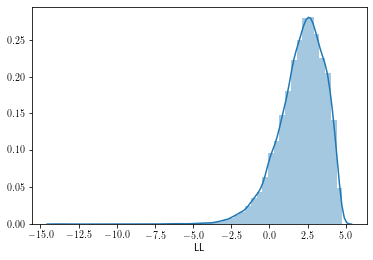

In [303]:
sns.distplot(df_sr_ffjord.LL)

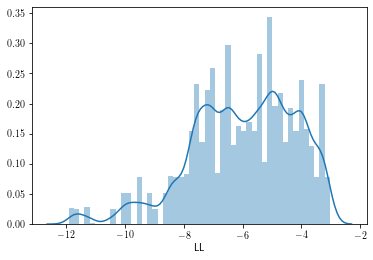

In [102]:
sns.distplot(df_sb_iwae.LL)

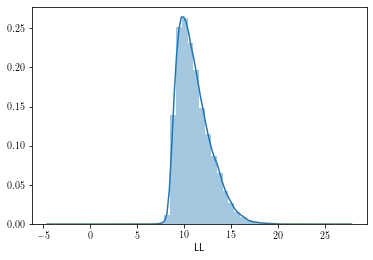

In [103]:
sns.distplot(df_sr_vae.LL)

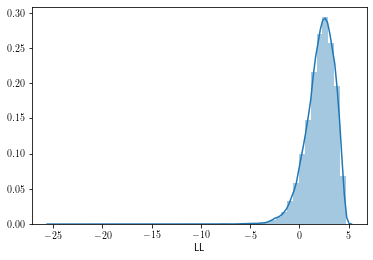

In [255]:
sns.distplot(df_sr_maf.LL)

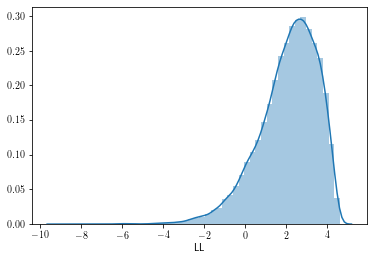

In [256]:
sns.distplot(df_sb_maf.LL)

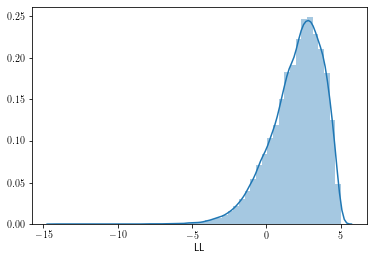

In [257]:
sns.distplot(df_sb_ffjord.LL)

In [258]:
l = df_sr_ffjord.LL - df_sb_ffjord.LL

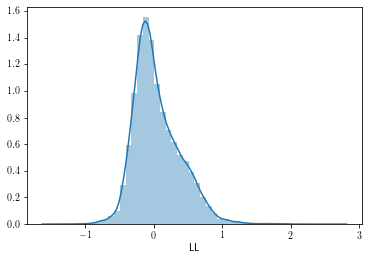

In [259]:
sns.distplot(l)

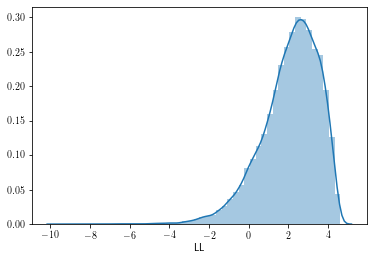

In [63]:
sns.distplot(df_sb_maf.LL)

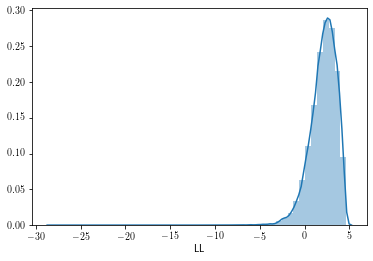

In [64]:
sns.distplot(df_sr_maf.LL)

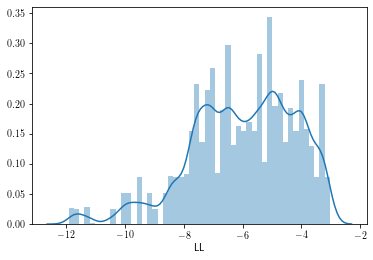

In [104]:
sns.distplot(df_sb_iwae.LL)

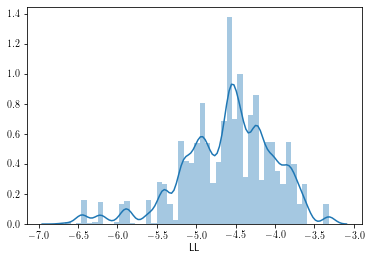

In [105]:
sns.distplot(df_sr_iwae.LL)

In [261]:
l = df_sr_maf.LL - df_sb_maf.LL

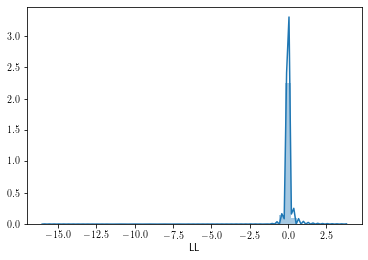

In [262]:
sns.distplot(l)

In [106]:
def postprocess(df_sr,df_sb,R_cutoff=5):
    print(df_sr.columns)
    auxillary = ['label'] + [col for col in df_sr.columns if col.startswith('_')]
    R = np.exp(df_sr.LL - df_sb.LL)
    print('R max', R.max())
    print('R min', R.min())
    df_agg = pd.concat([df_sr[auxillary], R, df_sr.LL, df_sb.LL], axis=1)#, columns=auxillary+['R','log_px_data',log_px_bkg'])
    df_agg.columns=auxillary+['R','log_px_data','log_px_bkg']
    df_agg.columns = [c.replace('_','-') for c in df_agg.columns]
    df_agg = df_agg[R<R_cutoff]
    print('Surviving after R<{} cut'.format(R_cutoff), df_agg.shape[0]/df_sr.shape[0])
    df_agg_sig, df_agg_bkg = df_agg[df_agg.label > 0.5], df_agg[df_agg.label < 0.5]
    
    return df_agg, df_agg_sig, df_agg_bkg

In [317]:
df_agg_vae, df_agg_sig_vae, df_agg_bkg_vae = postprocess(df_sr=df_sr_vae, df_sb=df_sb_vae, R_cutoff=100)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 956511.875
R min 9.501269770950671e-10
Surviving after R<100 cut 0.9733476625470178


In [107]:
df_agg_iwae, df_agg_sig_iwae, df_agg_bkg_iwae = postprocess(df_sr=df_sr_iwae, df_sb=df_sb_iwae, R_cutoff=50)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 2880.6953125
R min 0.08375971764326096
Surviving after R<50 cut 0.9206161561884292


In [56]:
df_agg_maf, df_agg_sig_maf, df_agg_bkg_maf = postprocess(df_sr=df_sr_maf, df_sb=df_sb_maf)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 1865.0657958984375
R min 8.51191739315027e-09
Surviving after R<5 cut 0.999498477521046


In [265]:
df_agg_nvp, df_agg_sig_nvp, df_agg_bkg_nvp = postprocess(df_sr=df_sr_nvp, df_sb=df_sb_nvp)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 3.5309605598449707
R min 0.06845715641975403
Surviving after R<5 cut 1.0


In [353]:
df_agg_ffjord, df_agg_sig_ffjord, df_agg_bkg_ffjord = postprocess(df_sr=df_sr_ffjord, df_sb=df_sb_ffjord, R_cutoff=15)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 14.64214038848877
R min 0.22362780570983887
Surviving after R<15 cut 1.0


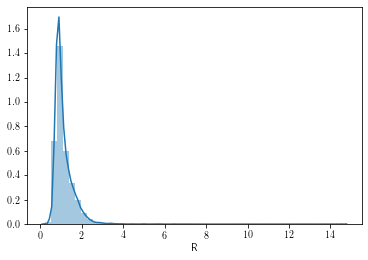

In [267]:
sns.distplot(df_agg_ffjord.R)

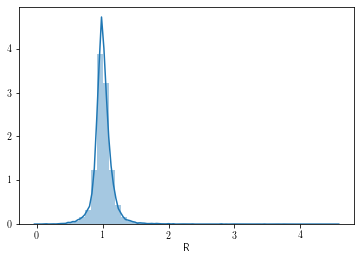

In [268]:
sns.distplot(df_agg_maf.R)

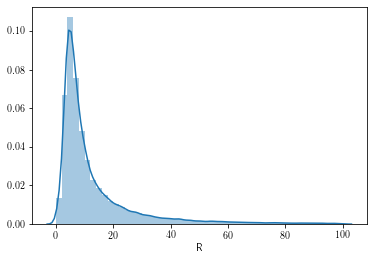

In [318]:
sns.distplot(df_agg_vae.R)

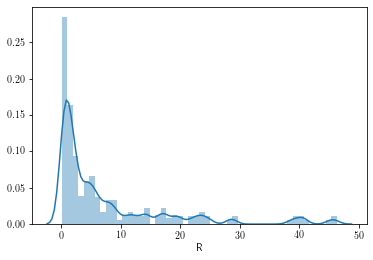

In [83]:
sns.distplot(df_agg_iwae.R)

In [16]:
def compare_sb(df_sig, df_bkg, var, logscale=False, kde=True):
    sns.distplot(df_sig[var], label='sig', kde=kde)
    sns.distplot(df_bkg[var], label='bkg', kde=kde)
    plt.legend()
    if logscale is True:
        plt.yscale('log')
    plt.show()

In [96]:
def lambda_v_logpx(x, y, x_sig, y_sig, fname='lambda_v_logpx_bkg.pdf', lims=((-2,5),(0,4))):
    xlim, ylilm = lims
    xmin, xmax = xlim
    ymin, ymax = ylilm
    fs = 16
    # xmin, xmax, ymin, ymax = -5,5,-5.,5

    plt.figure(figsize=(10,6))
    plt.tick_params(axis='both', which='major', labelsize=15)
    # plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.hexbin(x,y,gridsize=((60,60)), extent=(xmin,xmax, ymin,ymax), cmap='viridis')#, label='Background')
    # plt.hist2d(x,y,bins=((60,60)), range=((xmin,xmax),(ymin,ymax)),cmap='viridis')
    cb=plt.colorbar()
    cb.set_label(r'$N$', fontsize=fs)
    cb.ax.tick_params(labelsize=15)

    #create legend
    line1 = Line2D(range(1), range(1), color="white", marker='.', markersize=16, markerfacecolor="red", linestyle='none')
    line4 = Line2D(range(1), range(1), color="white", marker='H',markersize=12,markerfacecolor="tab:green", linestyle='none')
    plt.legend((line1,line4),('Signal', 'Background'), numpoints=1, loc=2, fontsize=14)

    color = 'red'
    plt.xlim((xmin,xmax))
    plt.ylim((ymin,ymax))
    plt.scatter(x_sig,y_sig, marker='.', c=color, label='Signal', alpha=0.8)
    # plt.legend(fontsize=18)

    plt.xlabel(r'$\log p(\mathbf{x} \vert \textsf{bkg})$', fontsize=20)
    # plt.ylabel(r'$\log p(\mathbf{x} \vert \textsf{data})$', fontsize=20)
    plt.ylabel(r'$\lambda(\mathbf{x})^{-1}$', fontsize=20)
    plt.savefig(os.path.join('imgs',fname), bbox_inches='tight', format='pdf', dpi=128)

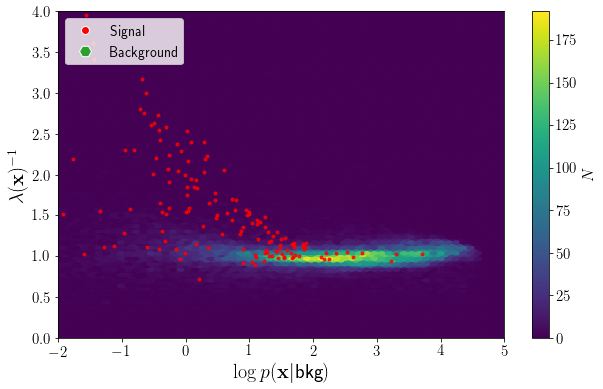

In [60]:
x = df_agg_bkg_maf['log-px-bkg']
y = df_agg_bkg_maf.R
x_sig = df_agg_sig_maf['log-px-bkg']
y_sig = df_agg_sig_maf.R
lambda_v_logpx(x,y,x_sig,y_sig, fname='lambda_v_logpx_bkg_test.pdf')

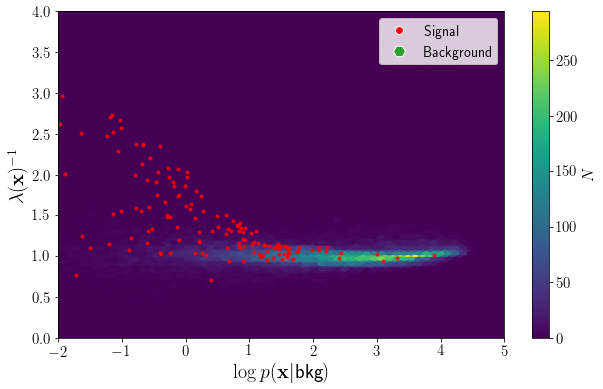

In [370]:
x = df_agg_bkg_nvp['log-px-bkg']
y = df_agg_bkg_nvp.R
x_sig = df_agg_sig_nvp['log-px-bkg']
y_sig = df_agg_sig_nvp.R
lambda_v_logpx(x,y,x_sig,y_sig, fname='lambda_v_logpx_bkg_NVP.pdf')

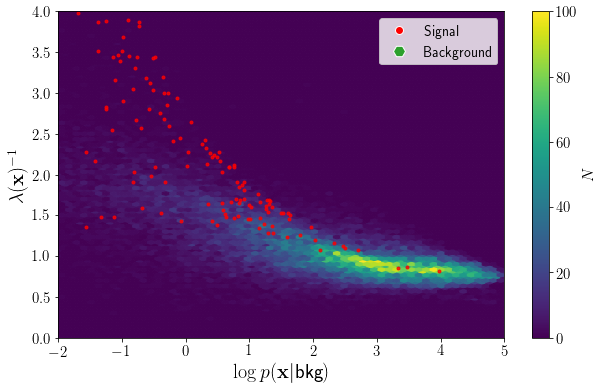

In [371]:
x = df_agg_bkg_ffjord['log-px-bkg']
y = df_agg_bkg_ffjord.R
x_sig = df_agg_sig_ffjord['log-px-bkg']
y_sig = df_agg_sig_ffjord.R
lambda_v_logpx(x,y,x_sig,y_sig, fname='lambda_v_logpx_bkg_FFJORD.pdf')

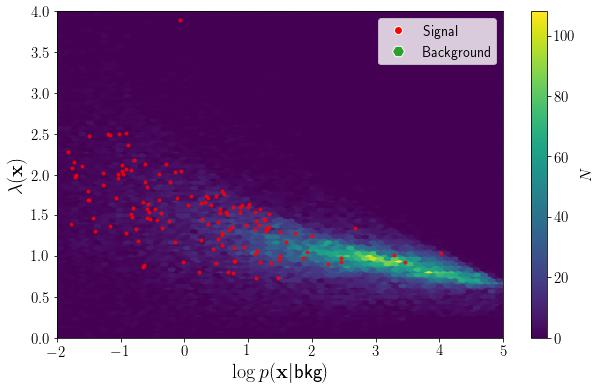

In [217]:
x = df_agg_bkg_ffjord['log-px-bkg']
y = df_agg_bkg_ffjord.R
x_sig = df_agg_sig_ffjord['log-px-bkg']
y_sig = df_agg_sig_ffjord.R
lambda_v_logpx(x,y,x_sig,y_sig, fname='lambda_v_logpx_bkg_FFJORD.pdf')

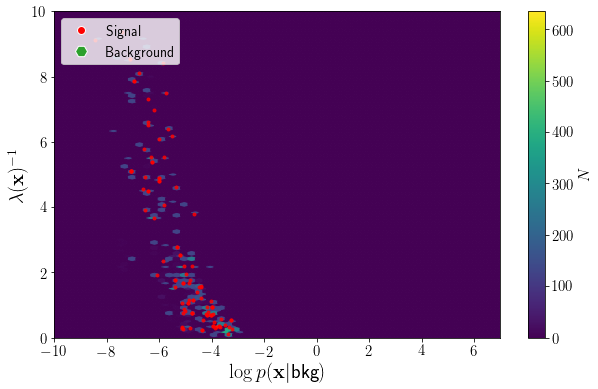

In [110]:
x = df_agg_bkg_iwae['log-px-bkg']
y = df_agg_bkg_iwae.R
x_sig = df_agg_sig_iwae['log-px-bkg']
y_sig = df_agg_sig_iwae.R
lambda_v_logpx(x,y,x_sig,y_sig, fname='lambda_v_logpx_bkg_iwae.pdf', lims=((-10,7),(0,10)))

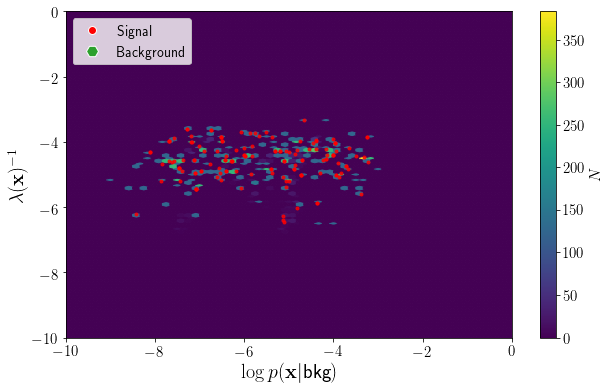

In [114]:
x = df_agg_bkg_iwae['log-px-bkg']
y = df_agg_bkg_iwae['log-px-data']
x_sig = df_agg_sig_iwae['log-px-bkg']
y_sig = df_agg_sig_iwae['log-px-data']
lambda_v_logpx(x,y,x_sig,y_sig, fname='test.pdf', lims=((-10,0),(-10,0)))

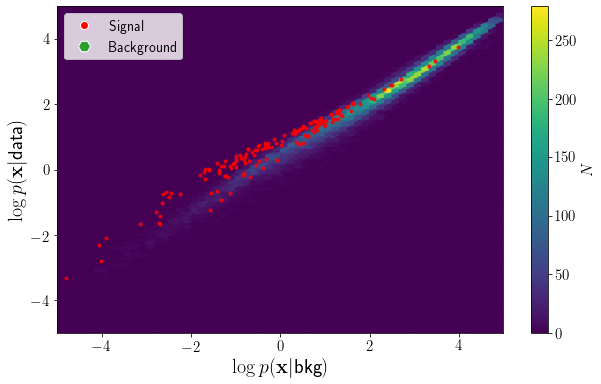

In [392]:
x = df_agg_bkg_ffjord['log-px-bkg']
y = df_agg_bkg_ffjord['log-px-data']
x_sig = df_agg_sig_ffjord['log-px-bkg']
y_sig = df_agg_sig_ffjord['log-px-data']
lambda_v_logpx(x,y,x_sig,y_sig, fname='logpx_bkg_v_data_FFJORD.pdf')

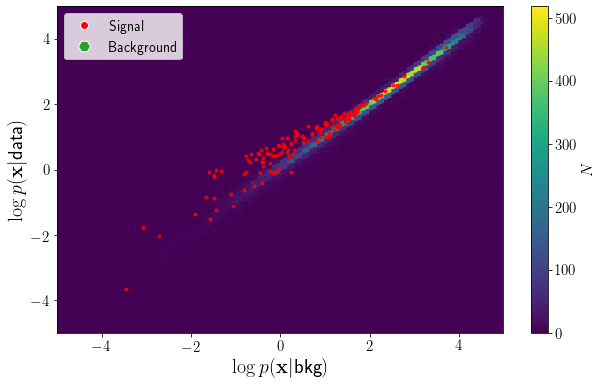

In [393]:
x = df_agg_bkg_maf['log-px-bkg']
y = df_agg_bkg_maf['log-px-data']
x_sig = df_agg_sig_maf['log-px-bkg']
y_sig = df_agg_sig_maf['log-px-data']
lambda_v_logpx(x,y,x_sig,y_sig, fname='logpx_bkg_v_data_MAF.pdf')

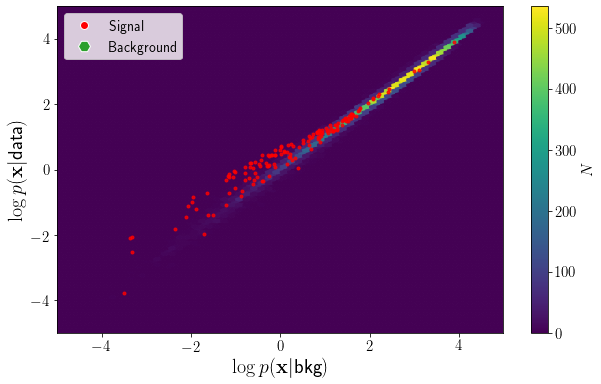

In [394]:
x = df_agg_bkg_nvp['log-px-bkg']
y = df_agg_bkg_nvp['log-px-data']
x_sig = df_agg_sig_nvp['log-px-bkg']
y_sig = df_agg_sig_nvp['log-px-data']
lambda_v_logpx(x,y,x_sig,y_sig, fname='logpx_bkg_v_data_NVP.pdf')

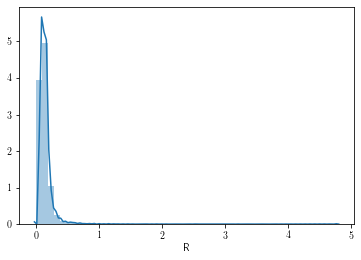

In [282]:
sns.distplot(df_agg_bkg_vae.R)

In [171]:
def compare_distributions(bkg, sig, logscale=False, fname='generic_compare.pdf'):   
    plt.figure(figsize=(10,6))
    plt.tick_params(axis='both', which='major', labelsize=16)
    sea_green = '#54ff9f'
    steel_blue = '#4e6bbd'
    crimson_tide = '#e50005'
    yellow = 'xkcd:crimson'
    orange = '#ffa500'
    nbins=32
    sns.distplot(bkg, color=steel_blue,hist=True, kde=False, label='Background', bins=nbins, hist_kws=dict(edgecolor="0.85", linewidth=0.5, alpha=0.65))
    sns.distplot(sig, color=sea_green,hist=True, kde=False, label='Signal', bins=nbins, hist_kws=dict(edgecolor="0.85", linewidth=0.5, alpha=0.65))
    
    if logscale is True:
        plt.yscale('log')
    plt.legend(fontsize=14)
    plt.xlabel(r'$\lambda(\mathbf{x})$', fontsize=20)
    plt.ylabel(r'Counts', fontsize=20)
    # plt.savefig(os.path.join('imgs',fname), bbox_inches='tight', format='pdf', dpi=128)

In [399]:
df_agg_bkg_maf.columns

Index(['label', '-Mjj', '-Mj1-OG', '-Mj2-OG', '-deltaM-OG', '-j1-tau21-OG',
       '-j2-tau21-OG', '--label', '--Mjj', '--Mj1', '--Mj2', 'R',
       'log-px-data', 'log-px-bkg'],
      dtype='object')

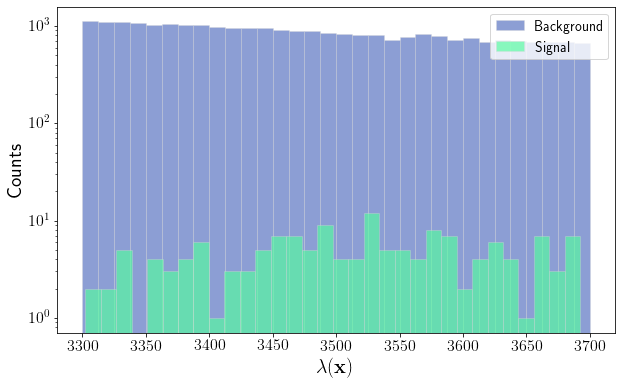

In [400]:
compare_distributions(bkg=df_agg_bkg_maf['-Mjj'], sig=df_agg_sig_maf['-Mjj'], logscale=True)

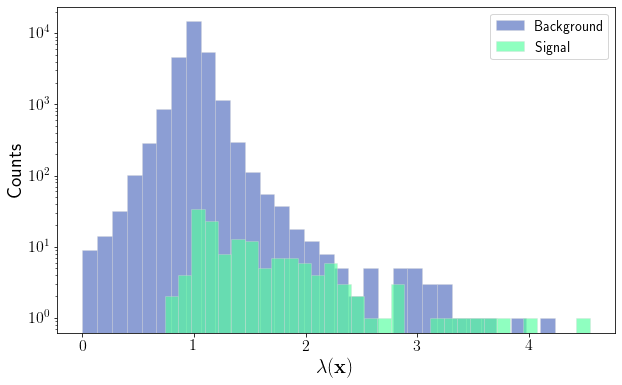

In [172]:
compare_distributions(bkg=df_agg_bkg_maf.R, sig=df_agg_sig_maf.R, logscale=True)

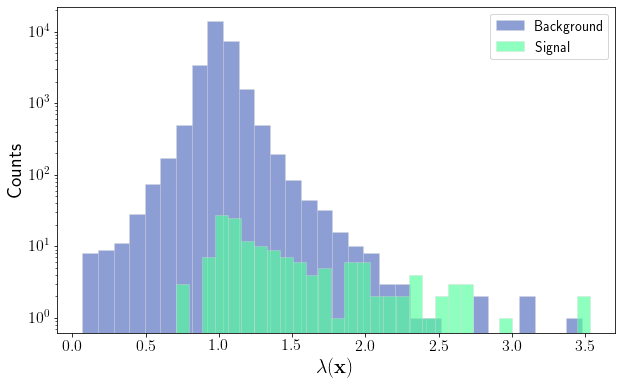

In [173]:
compare_distributions(bkg=df_agg_bkg_nvp.R, sig=df_agg_sig_nvp.R, logscale=True)

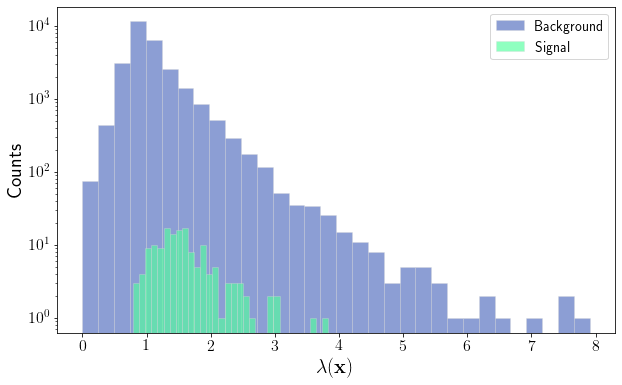

In [235]:
compare_distributions(bkg=df_agg_bkg_ffjord.R, sig=df_agg_sig_ffjord.R, logscale=True)

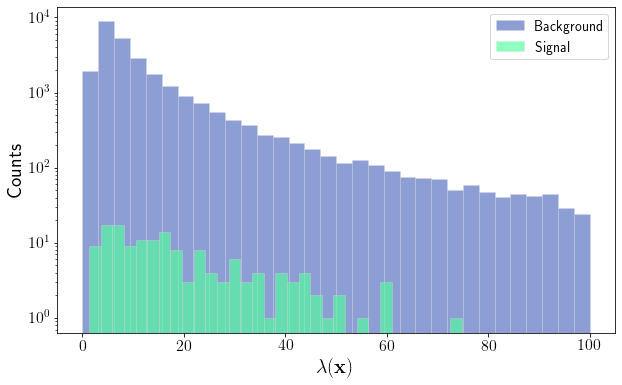

In [330]:
compare_distributions(bkg=df_agg_bkg_vae.R, sig=df_agg_sig_vae.R, logscale=True)

In [87]:
def plot_eff_multiple_nested(nested_dfs, labels, title='born2run', save_path='eff_comp.pdf'):

    def _boundaries(arrays):
        sizes = [a.shape[0] for a in arrays]
        a_primary = arrays[np.argmax(sizes)]
        a_min = np.empty(a_primary.shape[0])
        a_max = np.empty(a_primary.shape[0])

        for i in range(a_primary.shape[0]):

            try:
                elemwise = [a[i] for a in arrays]
                max_element = max(elemwise)
                min_element = min(elemwise)
                a_min[i] = min_element
                a_max[i] = max_element

            except IndexError:
                a_min[i] = a_primary[i]
                a_max[i] = a_primary[i]

        return a_min, a_max
    
    def _averaging(arrays):
        sizes = [a.shape[0] for a in arrays]
        a_primary = arrays[np.argmax(sizes)]
        a_avg = np.empty(a_primary.shape[0])
        a_std = np.empty(a_primary.shape[0])


        for i in range(a_primary.shape[0]):

            try:
                mean = np.mean([a[i] for a in arrays])
                std = np.std([a[i] for a in arrays])
                a_avg[i] = mean
                a_std[i] = std

            except IndexError:
                a_avg[i] = a_primary[i]
                a_std[i] = 0.0

        return a_avg, a_std
    

    # plt.figure()
    plt.figure(figsize=(10,6))
    plt.tick_params(axis='both', which='major', labelsize=16)

#    plt.axes([.1,.1,.8,.78])
#     plt.figtext(.5,.9, title, fontsize=22, ha='center')
#     plt.figtext(.5,.85, r'$b \rightarrow s \gamma$, Decorrelation comparison', fontsize=18,ha='center')
#    plt.figtext(.5,.9, r'$b \rightarrow s \gamma$, Decorrelation comparison', fontsize=18,ha='center')
    
    xcolors = ["denim blue", "medium green","pale red"]
    # palette = itertools.cycle(sns.xkcd_palette(xcolors))
    palette = itertools.cycle(sns.color_palette())

    for (dfs, label) in zip(nested_dfs, labels):
    
        if not isinstance(dfs, list):
            dfs = list(dfs)

        bkg_rej_all, sig_eff_all = list(), list()
        roc_auc_all = list()

        for df in dfs:
            fpr_i, tpr_i, thresholds = roc_curve(df.label, df.R)
            roc_auc_i = roc_auc_score(df.label, df.R)
            # fpr, tpr, thresholds = roc_curve(df['y_true'], df['y_prob'])
            # roc_auc = roc_auc_score(df.y_true, df.y_prob)

            # plt.plot(fpr_i, tpr_i, lw=1.8, label='{} (area = {:.4f})'.format('dummy',roc_auc_i))

            bkg_rej_all.append(1/(fpr_i + 1e-10))
            sig_eff_all.append(tpr_i)
            roc_auc_all.append(roc_auc_i)

        roc_auc_mean = np.mean(roc_auc_all)
        roc_auc_std = np.std(roc_auc_all)

        br_avg, br_std = _averaging(bkg_rej_all)
        se_avg, se_std = _averaging(sig_eff_all)
        
        color = next(palette)
        plt.plot(se_avg, br_avg, lw=1.8, label='{} (AUC = {:.3f} $\pm$ {:.3f})'.format(label, roc_auc_mean, roc_auc_std), color=color)
        plt.fill_between(se_avg, br_avg-br_std, br_avg+br_std, interpolate=True, alpha=0.25, color=color)
        
    plt.xlim([0.05, 1.0])
    plt.ylim([1.0, 1e5])
    delta = 0.1
    plt.xticks(np.arange(0.1, 1.+delta, delta))
    
    plt.yscale('log', nonposy='clip')
    plt.xlabel('Signal Efficiency', fontsize=20)
    plt.ylabel('Background Rejection', fontsize=20)
    plt.legend(loc="best", fontsize=16)
    
    plt.savefig(os.path.join('imgs', save_path), format='pdf', dpi=64, bbox_inches='tight')

In [89]:
df_agg_mafs = []
for (df_sr, df_sb) in zip([df_sr_maf, df_sr_maf1, df_sr_maf2],[df_sb_maf, df_sb_maf1, df_sb_maf2]):
    df_agg, *_ = postprocess(df_sr=df_sr, df_sb=df_sb)
    df_agg_mafs.append(df_agg)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 1865.0657958984375
R min 8.51191739315027e-09
Surviving after R<5 cut 0.999498477521046
Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 

In [90]:
df_agg_nvps = []
for (df_sr, df_sb) in zip([df_sr_nvp, df_sr_nvp1, df_sr_nvp2],[df_sb_nvp, df_sb_nvp1, df_sb_nvp2]):
    df_agg, *_ = postprocess(df_sr=df_sr, df_sb=df_sb)
    df_agg_nvps.append(df_agg)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 3.5309605598449707
R min 0.06845715641975403
Surviving after R<5 cut 1.0
Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
    

In [91]:
df_agg_ffjords = []
for (df_sr, df_sb) in zip([df_sr_ffjord, df_sr_ffjord1, df_sr_ffjord2],[df_sb_ffjord, df_sb_ffjord1,df_sb_ffjord2]):
    df_agg, *_ = postprocess(df_sr=df_sr, df_sb=df_sb)
    df_agg_ffjords.append(df_agg)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 55.18628692626953
R min 0.013017680495977402
Surviving after R<5 cut 0.9987820168368261
Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 

In [92]:
df_agg_vaes = []
for (df_sr, df_sb) in zip([df_sr_vae],[df_sb_vae]):
    df_agg, *_ = postprocess(df_sr=df_sr, df_sb=df_sb)
    df_agg_vaes.append(df_agg)

Index(['label', '_Mjj', 'Mj1', 'j1-sqrt(tau21)/tau11', 'j1-tau21', 'j1-tau32',
       'j1-tau43', 'Mj2', 'j2-tau21', 'j2-tau32', 'j2-tau43', 'deltaM',
       '_Mj1-OG', '_Mj2-OG', '_deltaM-OG', '_j1-tau21-OG', '_j2-tau21-OG',
       'jet1-pt', 'jet1-eta', 'jet1-phi', 'jet2-pt', 'jet2-eta', 'jet2-phi',
       'jet1-E', 'jet1-px', 'jet1-py', 'jet1-pz', 'jet2-E', 'jet2-px',
       'jet2-py', 'jet2-pz', 'jet3-pt', 'jet3-eta', 'jet3-phi', 'jet3-m',
       'met-pt', 'met-phi', 'LL', '__label', '__Mjj', '__Mj1', '__Mj2'],
      dtype='object')
R max 956511.875
R min 9.501269770950671e-10
Surviving after R<5 cut 0.26544868350349277


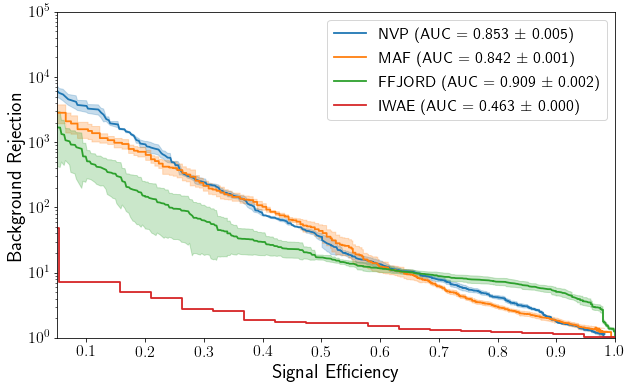

In [93]:
plot_eff_multiple_nested([df_agg_nvps, df_agg_mafs, df_agg_ffjords, df_agg_vaes, [df_agg_iwae]], labels=['NVP','MAF', 'FFJORD', 'IWAE'], title='born2run', save_path='eff_comp.pdf')

In [ ]:
compare_sb(df_sig, df_bkg, 'j1-tau21')

In [ ]:
compare_sb(df_sig, df_bkg, 'j2-tau21')

In [ ]:
compare_sb(df_sig, df_bkg, 'Mj1', logscale=True, kde=False)

In [ ]:
compare_sb(df_sig, df_bkg, 'Mj2', logscale=True, kde=False)

In [ ]:
compare_sb(df_sig, df_bkg, 'deltaM', logscale=True, kde=False)

In [ ]:
compare_sb(df_sig, df_bkg, 'Mjj', logscale=True, kde=False)

In [ ]:
compare_sb(df_sig, df_bkg, 'jet1-pt', logscale=True, kde=False)

In [ ]:
# Subsample signal events 
N_SIG = 10000
df_sig = df_sig.sample(n=N_SIG)
df = pd.concat([df_sig, df_bkg]).sample(frac=1).reset_index(drop=True)

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_test, df_val = train_test_split(df_test, test_size=0.25)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_train.to_hdf('jets_all_train.h5', key='df')
df_test.to_hdf('jets_all_test.h5', key='df')
df_val.to_hdf('jets_all_val.h5', key='df')

In [ ]:
logit_transform = True

In [ ]:
def scale_dataset(df, scaler=None, logit_transform=False):

    df_protected = df[['label', 'Mjj']+[col for col in df.columns if 'OG' in col]]
    df_unprotected = df.drop(df_protected.columns, axis=1)

    if logit_transform is True:
        EPS = 0.01
        if scaler is None:
            scaler = MinMaxScaler((0+EPS,1-EPS))
            df_unprotected = pd.DataFrame(logit(scaler.fit_transform(df_unprotected)), columns=df_unprotected.columns)
        else:
            df_unprotected = pd.DataFrame(logit(scaler.transform(df_unprotected)), columns=df_unprotected.columns)
    else:
        if scaler is None:
            scaler = MinMaxScaler((-1,1))
            df_unprotected = pd.DataFrame(scaler.fit_transform(df_unprotected), columns=df_unprotected.columns)
        else:
            df_unprotected = pd.DataFrame(scaler.transform(df_unprotected), columns=df_unprotected.columns)

    df_scaled = pd.concat([df_protected, df_unprotected], axis=1)
    df_scaled = df_scaled.dropna()
    
    return df_scaled, scaler

In [ ]:
df_train_scaled, scaler = scale_dataset(df_train, logit_transform=True)

In [ ]:
df_test_scaled, scaler = scale_dataset(df_test, scaler=scaler, logit_transform=True)

In [ ]:
df_test_scaled.head()

In [ ]:
df_train_scaled.to_hdf('jets_medium_logit_train.h5', key='df')
df_test_scaled.to_hdf('jets_medium_logit_test.h5', key='df')

## Plots

In [ ]:
df_scaled_sig = df_test_scaled[df_test_scaled.label > 0.5]
df_scaled_bkg = df_test_scaled[df_test_scaled.label < 0.5]

In [ ]:
df_scaled_sig = df_train_scaled[df_train_scaled.label > 0.5]
df_scaled_bkg = df_train_scaled[df_train_scaled.label < 0.5]

In [ ]:
compare_sb(df_scaled_sig, df_scaled_bkg, 'Mjj', logscale=True, kde=False)

In [ ]:
for col in df_scaled_sig.columns[1:]:
    compare_sb(df_scaled_sig, df_scaled_bkg, col)

In [ ]:
for col in df_scaled_sig.columns[1:]:
    compare_sb(df_scaled_sig, df_scaled_bkg, col)